# CaliforniaHouse Price data

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)
import settings
# from kaggle import settings
%matplotlib inline

## Configuration

In [2]:
csv_file = settings.APP_FOLDER / 'data' /'california-housing-prices-data-extra-features'/ 'California_Houses.csv'

In [3]:
df = pd.read_csv(csv_file)

df.shape

(20640, 14)

In [4]:
df.sample(5)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
1362,165900.0,6.0424,4,2341,408,1235,431,38.03,-122.00,7901.527660,556389.286679,735724.617162,77798.699994,47354.885656
6590,500001.0,15.0001,48,1371,164,528,155,34.19,-118.18,35643.755758,16402.141901,189229.444043,484238.056480,552267.223117
6042,94300.0,2.6250,30,1185,317,1466,302,34.05,-117.74,48133.280714,46404.561127,157799.298913,523458.632723,591415.325242
10987,252200.0,5.0210,23,3498,636,1574,642,33.75,-117.81,19570.527516,52263.330396,129879.125559,543407.207504,611442.312684
6075,267200.0,5.6015,33,4518,716,2037,764,34.08,-117.87,44279.147233,34559.204968,165357.812064,512713.254655,580702.780126


## EDA

In [5]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,"206,855.82",3.87,28.64,"2,635.76",537.90,"1,425.48",499.54,35.63,-119.57,"40,509.26","269,421.98","398,164.93","349,187.55","386,688.42"
std,"115,395.62",1.90,12.59,"2,181.62",421.25,"1,132.46",382.33,2.14,2.00,"49,140.04","247,732.45","289,400.56","217,149.88","250,122.19"
min,"14,999.00",0.50,1.00,2.00,1.00,3.00,1.00,32.54,-124.35,120.68,420.59,484.92,569.45,456.14
25%,"119,600.00",2.56,18.00,"1,447.75",295.00,787.00,280.00,33.93,-121.80,"9,079.76","32,111.25","159,426.39","113,119.93","117,395.48"
50%,"179,700.00",3.53,29.00,"2,127.00",435.00,"1,166.00",409.00,34.26,-118.49,"20,522.02","173,667.46","214,739.83","459,758.88","526,546.66"
75%,"264,725.00",4.74,37.00,"3,148.00",647.00,"1,725.00",605.00,37.71,-118.01,"49,830.41","527,156.24","705,795.40","516,946.49","584,552.01"
max,"500,001.00",15.00,52.00,"39,320.00","6,445.00","35,682.00","6,082.00",41.95,-114.31,"333,804.69","1,018,260.12","1,196,919.27","836,762.68","903,627.66"


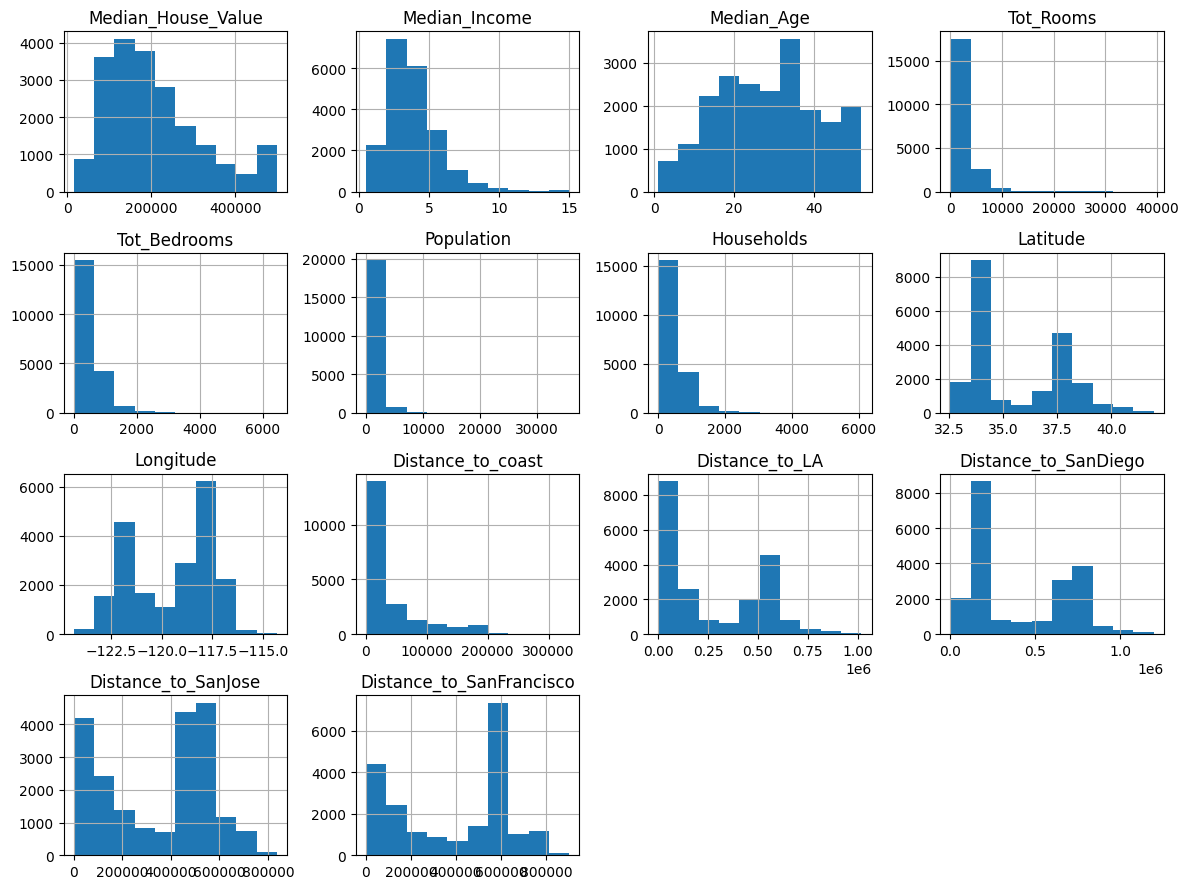

In [6]:
df.hist(figsize=(12,9))
plt.tight_layout()
plt.show()

/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/

<Axes: >

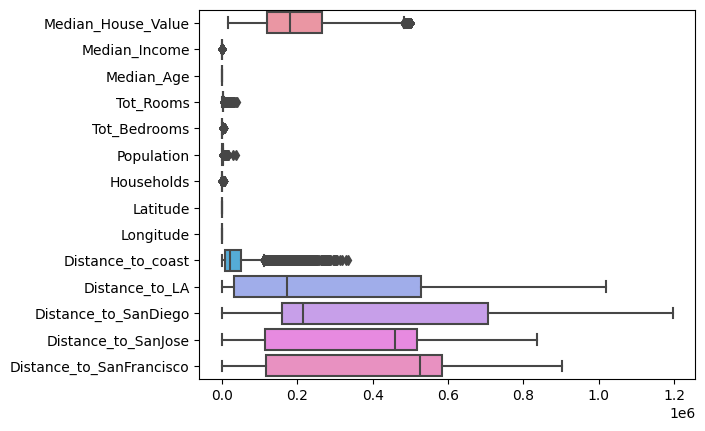

In [7]:
sns.boxplot(data=df, orient='h')

### Correlation

In [8]:
df.corr()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_House_Value,1.00,0.69,0.11,0.13,0.05,-0.02,0.07,-0.14,-0.05,-0.47,-0.13,-0.09,-0.04,-0.03
Median_Income,0.69,1.00,-0.12,0.20,-0.01,0.00,0.01,-0.08,-0.02,-0.24,-0.07,-0.06,-0.04,-0.02
Median_Age,0.11,-0.12,1.00,-0.36,-0.32,-0.30,-0.30,0.01,-0.11,-0.23,-0.03,0.04,-0.09,-0.10
Tot_Rooms,0.13,0.20,-0.36,1.00,0.93,0.86,0.92,-0.04,0.04,-0.00,-0.02,-0.04,0.03,0.03
Tot_Bedrooms,0.05,-0.01,-0.32,0.93,1.00,0.88,0.98,-0.07,0.07,-0.02,-0.06,-0.07,0.06,0.06
Population,-0.02,0.00,-0.30,0.86,0.88,1.00,0.91,-0.11,0.10,-0.04,-0.11,-0.11,0.08,0.09
Households,0.07,0.01,-0.30,0.92,0.98,0.91,1.00,-0.07,0.06,-0.06,-0.06,-0.07,0.05,0.05
Latitude,-0.14,-0.08,0.01,-0.04,-0.07,-0.11,-0.07,1.00,-0.92,0.30,0.94,0.99,-0.86,-0.90
Longitude,-0.05,-0.02,-0.11,0.04,0.07,0.10,0.06,-0.92,1.00,0.01,-0.89,-0.96,0.92,0.95
Distance_to_coast,-0.47,-0.24,-0.23,-0.00,-0.02,-0.04,-0.06,0.30,0.01,1.00,0.20,0.21,-0.08,-0.07


<Axes: >

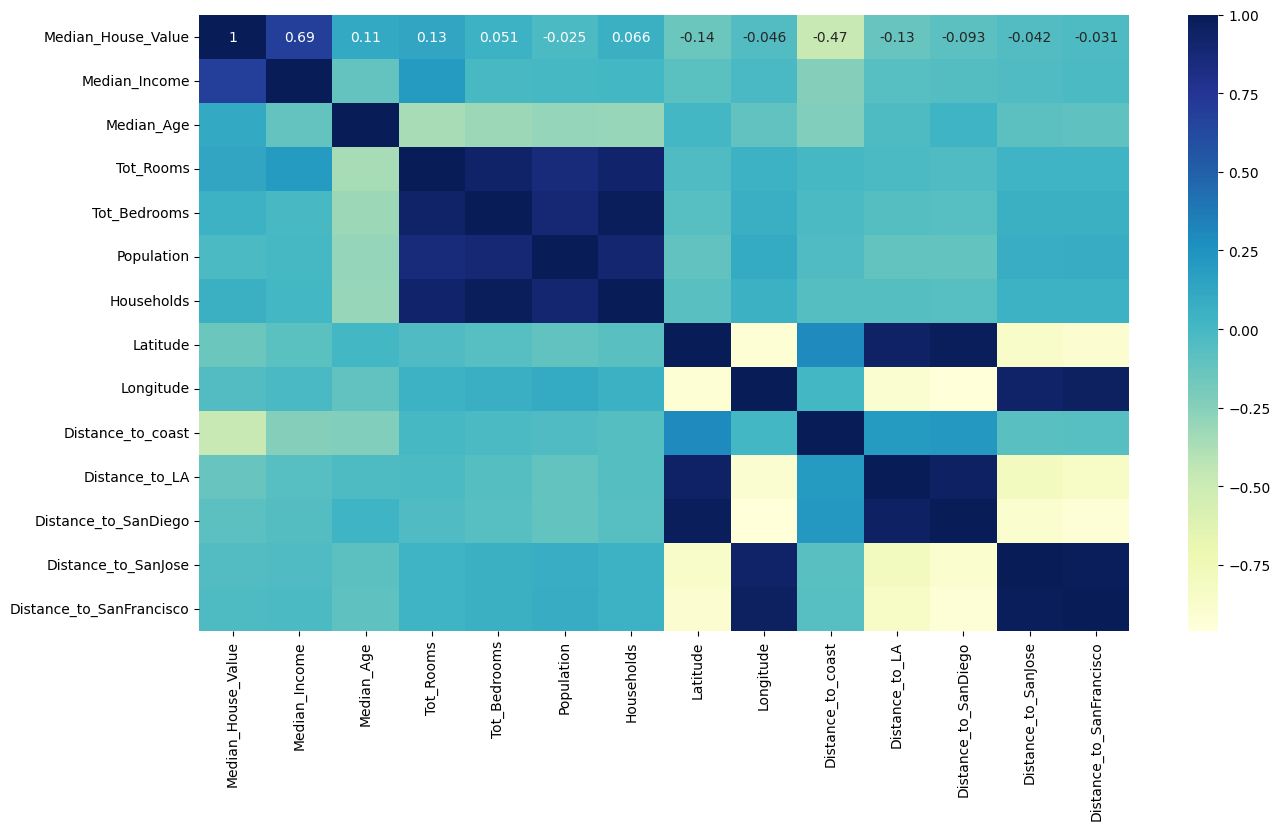

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [10]:
sns.__version__

'0.12.2'